In [1]:
#data loading
import pandas as pd
filename="/content/Arrests.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames released colour  year  age     sex employed citizen  checks
0            1      Yes  White  2002   21    Male      Yes     Yes       3
1            2       No  Black  1999   17    Male      Yes     Yes       3
2            3      Yes  White  2000   24    Male      Yes     Yes       3
3            4       No  Black  2000   46    Male      Yes     Yes       1
4            5      Yes  Black  1999   27  Female      Yes     Yes       1
...        ...      ...    ...   ...  ...     ...      ...     ...     ...
5221      5222      Yes  White  2000   17    Male      Yes     Yes       0
5222      5223      Yes  White  2000   21  Female      Yes     Yes       0
5223      5224      Yes  Black  1999   21  Female      Yes     Yes       1
5224      5225       No  Black  1998   24    Male      Yes     Yes       4
5225      5226      Yes  White  1999   16    Male      Yes     Yes       3

[5226 rows x 9 columns]


In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
released,0
colour,0
year,0
age,0
sex,0
employed,0
citizen,0
checks,0


In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="checks"

#transform string into int
transformColumns={1,2,5,6,7}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  released  colour  year  age  sex  employed  citizen  checks
0            1         1       1  2002    9    1         1        1       3
1            2         0       0  1999    5    1         1        1       3
2            3         1       1  2000   12    1         1        1       3
3            4         0       0  2000   34    1         1        1       1
4            5         1       0  1999   15    0         1        1       1
...        ...       ...     ...   ...  ...  ...       ...      ...     ...
5221      5222         1       1  2000    5    1         1        1       0
5222      5223         1       1  2000    9    0         1        1       0
5223      5224         1       0  1999    9    0         1        1       1
5224      5225         0       0  1998   12    1         1        1       4
5225      5226         1       1  1999    4    1         1        1       3

[5226 rows x 9 columns]


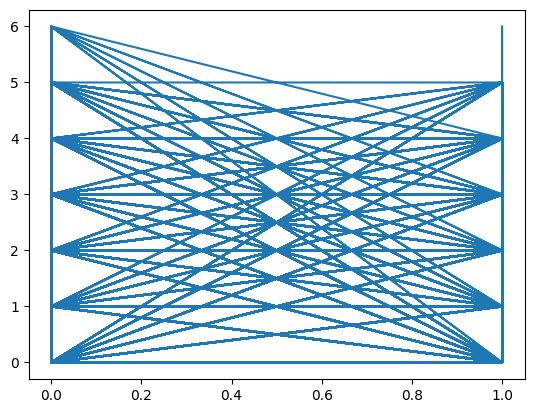

In [5]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 5226 artists>

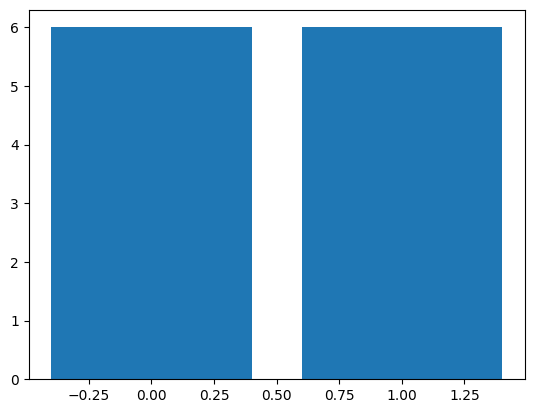

In [6]:
plt.bar(a[a.columns[2]],a[str(target)])

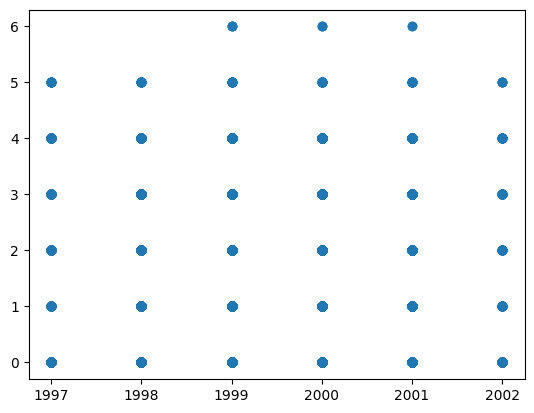

In [7]:
plt.scatter(a[a.columns[3]], a[str(target)])

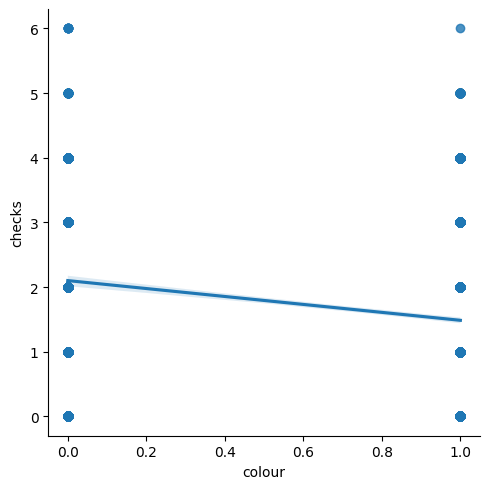

In [9]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="colour",y="checks",data=a)

<Axes: xlabel='age', ylabel='checks'>

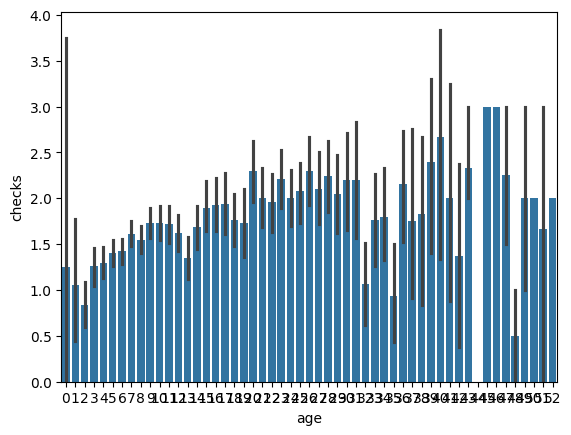

In [10]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='sex', ylabel='checks'>

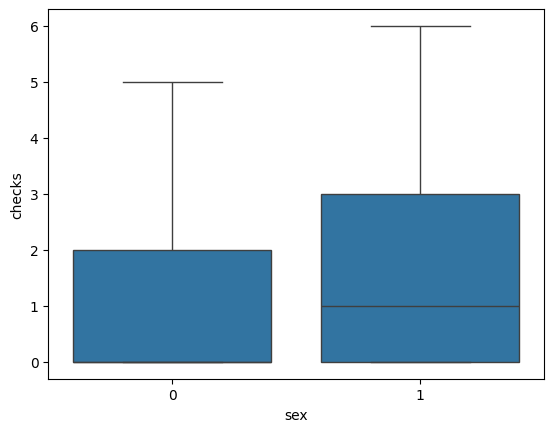

In [12]:
sns.boxplot(x=a.columns[5],y=str(target),data=a)

<ipython-input-13-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='checks', ylabel='Density'>

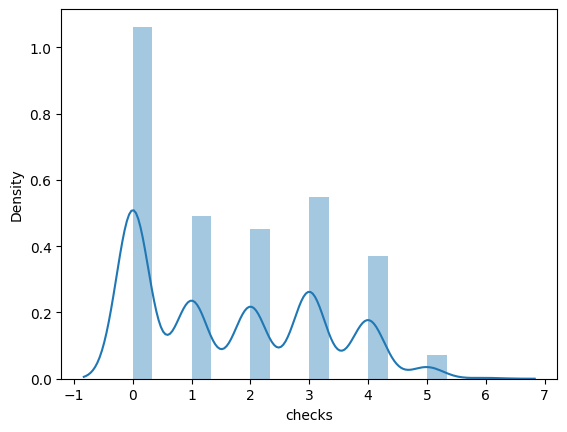

In [13]:
sns.distplot(a[str(target)])

<Axes: xlabel='year', ylabel='Density'>

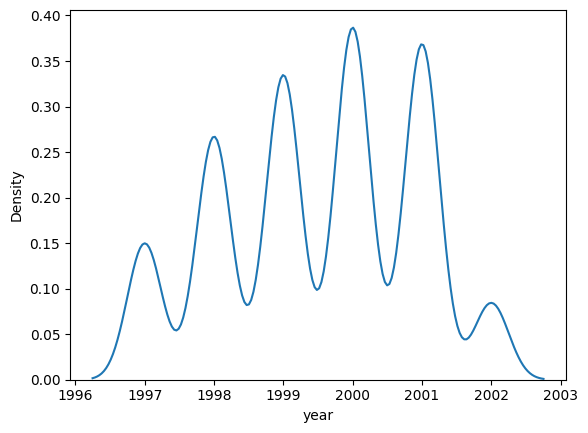

In [15]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='sex', ylabel='count'>

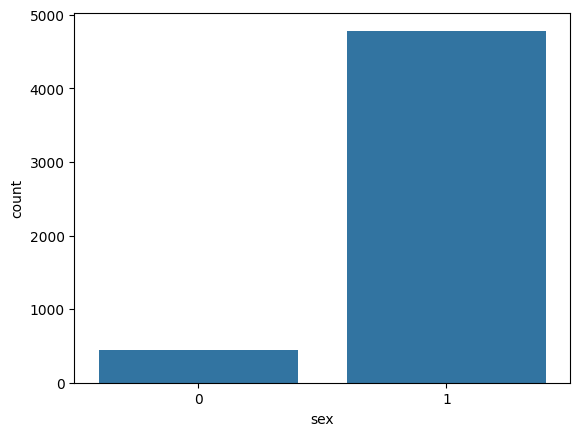

In [16]:
sns.countplot(x=a.columns[5],data=a)

<Axes: >

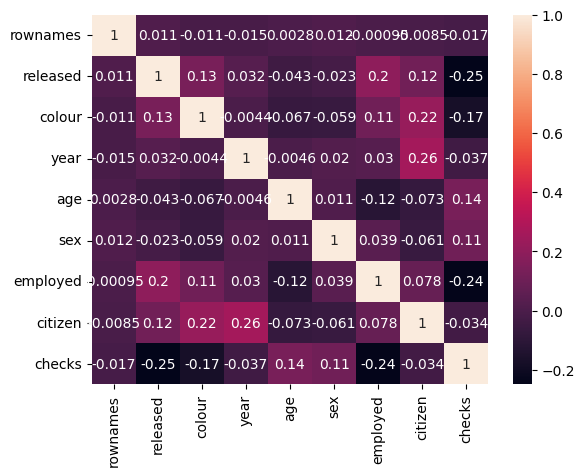

In [17]:
#data=a.select_dtypes(include=np.number).corr()
#Produce heatmap
data=a.corr()
sns.heatmap(data, annot=True)

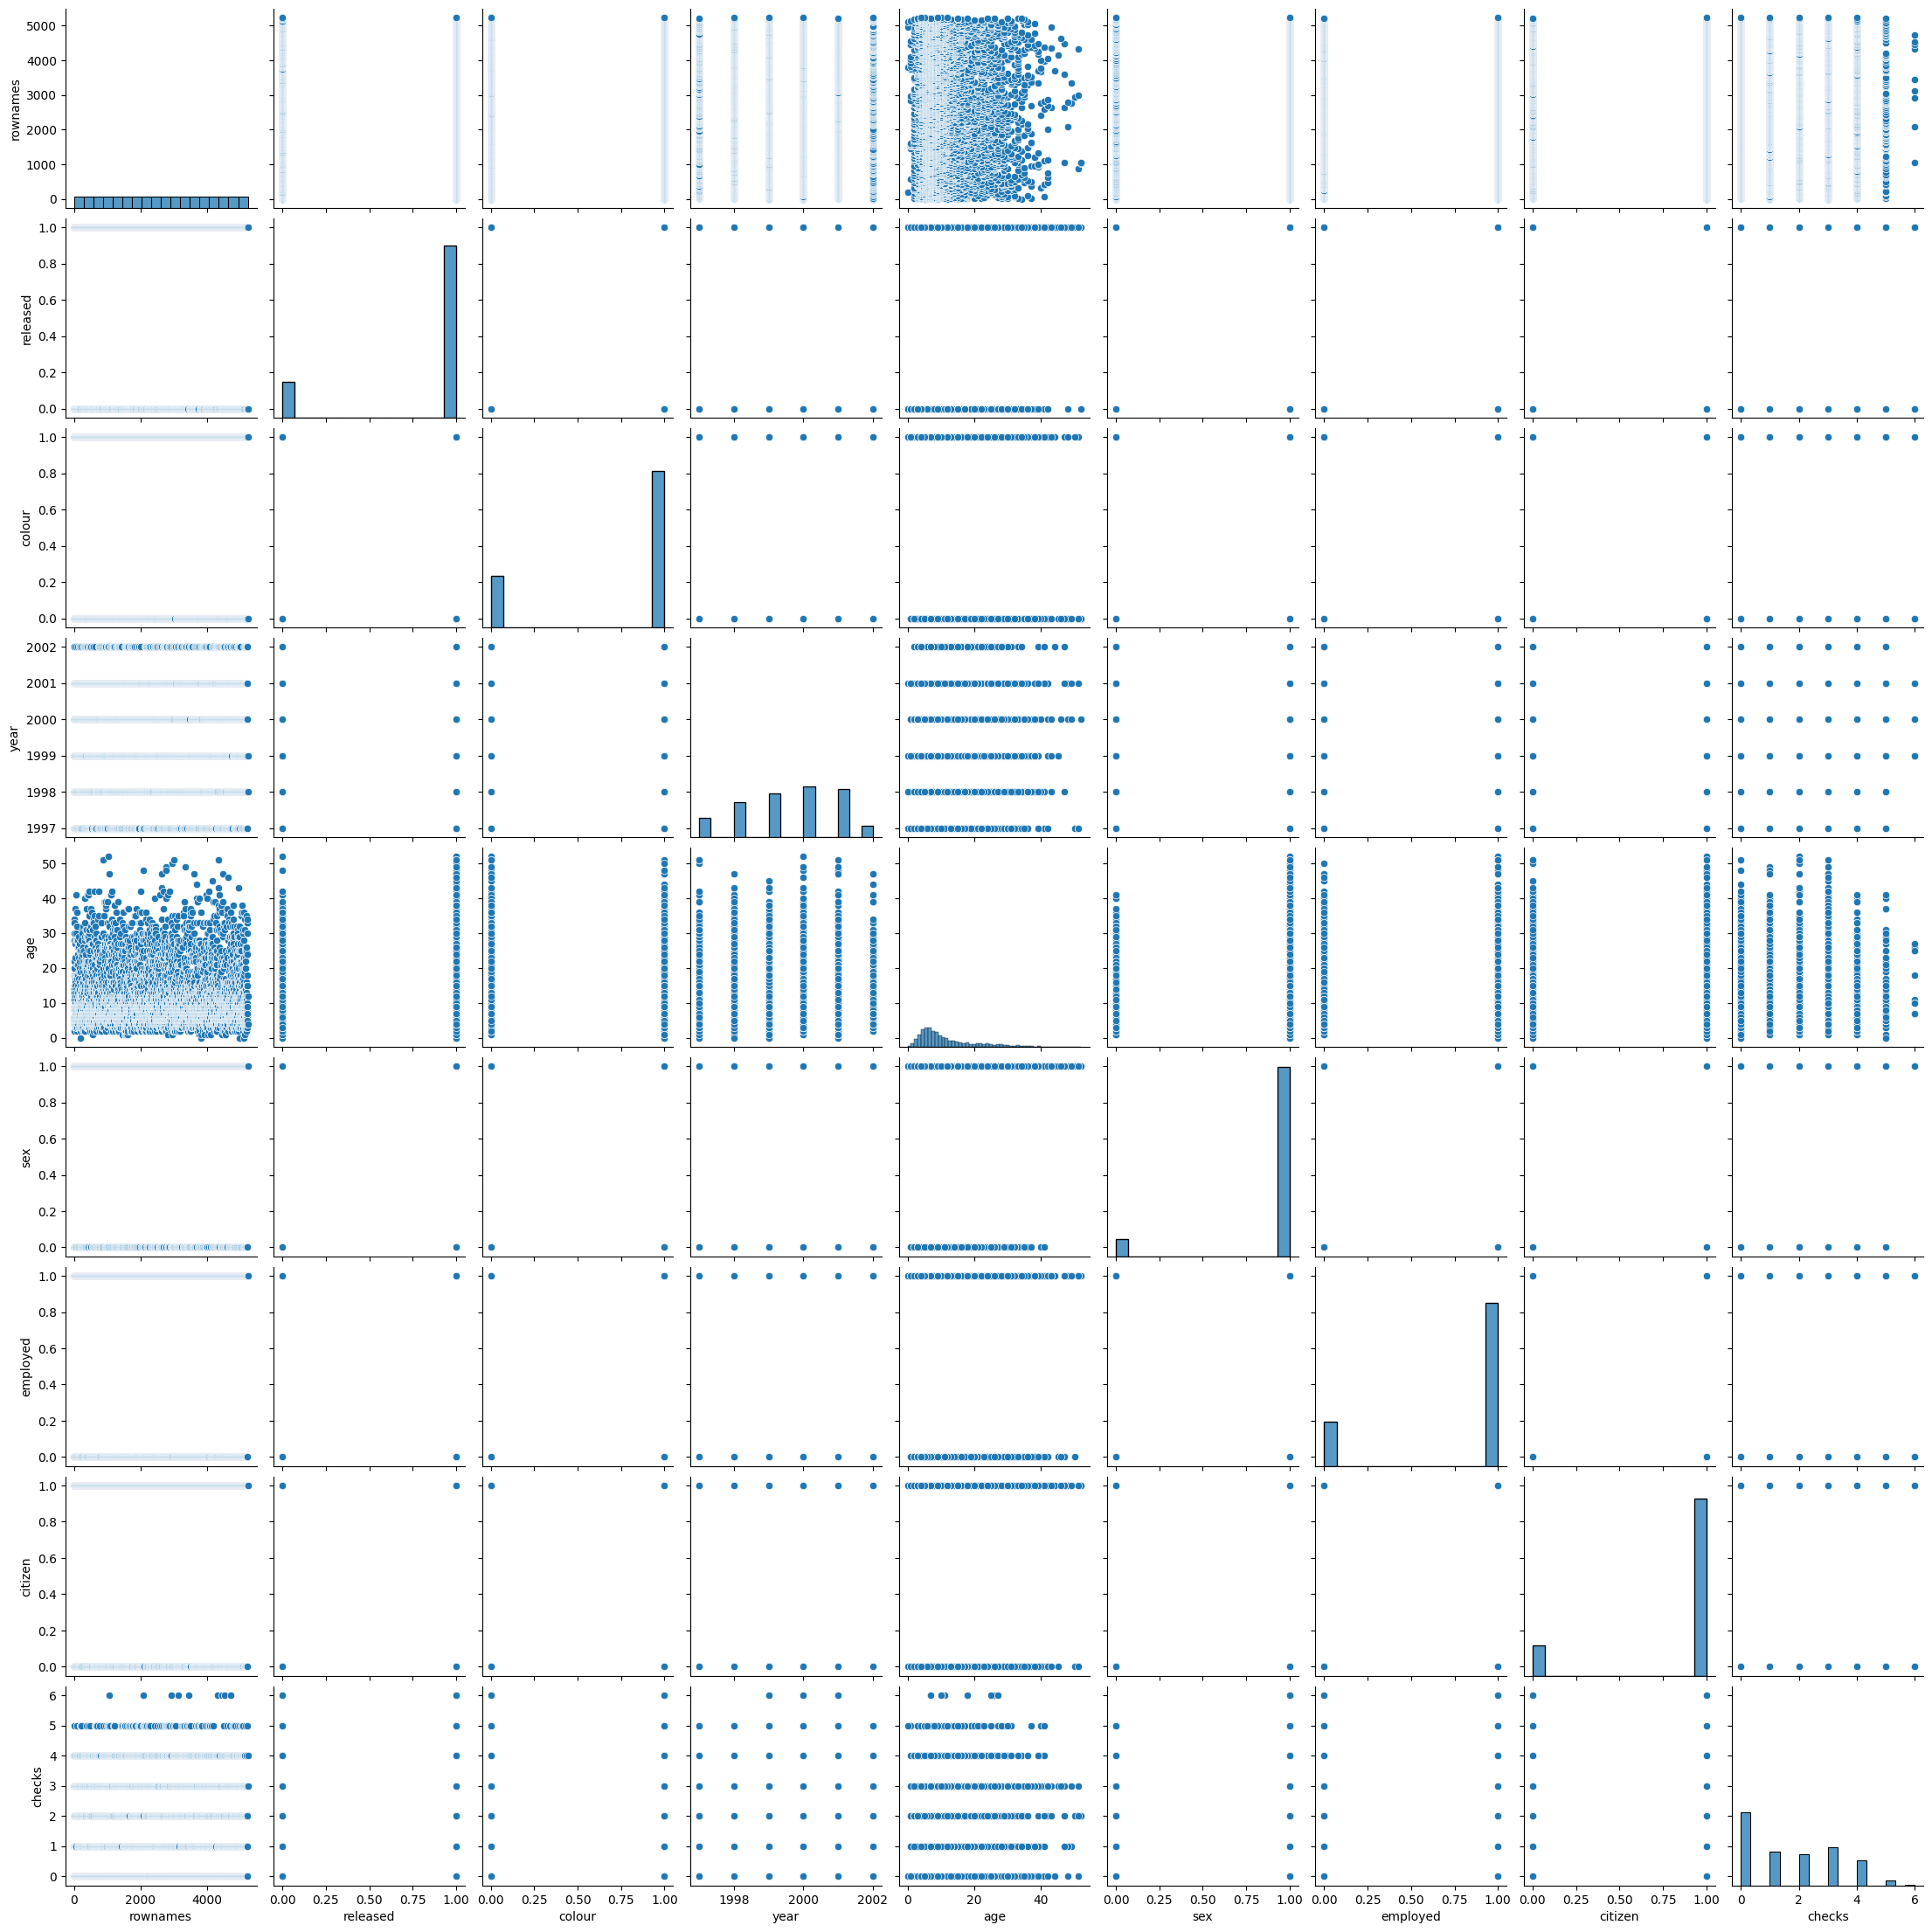

In [18]:
sns.pairplot(data=a)

In [19]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  released  colour  year  age  sex  employed  citizen
0            1         1       1  2002    9    1         1        1
1            2         0       0  1999    5    1         1        1
2            3         1       1  2000   12    1         1        1
3            4         0       0  2000   34    1         1        1
4            5         1       0  1999   15    0         1        1
...        ...       ...     ...   ...  ...  ...       ...      ...
5221      5222         1       1  2000    5    1         1        1
5222      5223         1       1  2000    9    0         1        1
5223      5224         1       0  1999    9    0         1        1
5224      5225         0       0  1998   12    1         1        1
5225      5226         1       1  1999    4    1         1        1

[5226 rows x 8 columns]


In [20]:
print(y)

0       3
1       3
2       3
3       1
4       1
       ..
5221    0
5222    0
5223    1
5224    4
5225    3
Name: checks, Length: 5226, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train)

       rownames  pharvis   lnhhexp       age  sex  married  educ  illness  \
24728     24729        0  1.895554  2.564950    0        0     2        0   
14217     14218        1  2.706446  3.912023    1        1     4        2   
9092       9093        0  1.874600  3.218876    1        1     4        0   
24181     24182        3  1.685874  0.693147    0        0     3        1   
19438     19439        0  1.574304  2.995732    0        0     0        1   
...         ...      ...       ...       ...  ...      ...   ...      ...   
8608       8609        0  1.944876  4.343805    1        0     2        0   
7414       7415        0  2.368676  2.995732    1        0     3        0   
5387       5388        0  3.867368  0.000000    0        0     9        3   
13256     13257        0  2.494259  2.302585    1        0     4        0   
16347     16348        0  1.547668  0.000000    0        0     4        2   

       injury  illdays  actdays  insurance  
24728       0        0        

In [22]:
print(y_train)

946     0
4631    3
3684    3
3873    3
279     0
       ..
2677    1
79      0
264     0
1562    3
5014    5
Name: checks, Length: 4180, dtype: int64


In [23]:
print(x_test)

      rownames  released  colour  year  age  sex  employed  citizen
1665      1666         0       0  2001   18    1         1        0
1491      1492         1       1  2001   21    1         1        1
1779      1780         1       1  1997   10    1         0        1
377        378         1       1  2001   19    1         0        1
367        368         1       1  1997    4    1         0        0
...        ...       ...     ...   ...  ...  ...       ...      ...
4473      4474         1       1  2001   10    1         1        1
2214      2215         1       1  1998    9    1         1        1
3151      3152         1       1  1999   17    1         0        1
1710      1711         0       1  1997    9    1         0        0
1015      1016         1       1  2001   22    1         1        1

[1046 rows x 8 columns]


In [24]:
print(y_test)

1665    0
1491    1
1779    2
377     3
367     0
       ..
4473    4
2214    0
3151    4
1710    3
1015    0
Name: checks, Length: 1046, dtype: int64


In [25]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [26]:
print(ypred)

[2.38293387 1.48343827 2.14967227 ... 2.16330385 2.67491838 1.51174745]


In [31]:
print(model.predict([[1666,0,0,2001,18,1,1,0]]))

[2.38293387]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [33]:
print(ypred)

[3. 4. 0. ... 2. 2. 2.]


In [34]:
print(model.predict([[1666,0,0,2001,18,1,1,0]]))

[2.38293387]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [36]:
print(ypred)

[3.13 2.94 2.45 ... 2.48 2.49 2.27]


In [37]:
print(model.predict([[1666,0,0,2001,18,1,1,0]]))

[2.38293387]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
